In [5]:
from sklearn import linear_model
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gmean

In [ ]:
# section1

In [ ]:
"""
1shou 問1
a. 植物の成長速度(単位:mm/日)
比率尺度
 b. 植物の病気の有無(単位:病気/健康) 
名義尺度
c. 絶対温度(熱力学温度)で測定した気温(単位:ケルビン,K) 
比率尺度
d. 農家アンケートで測定した仕事の「やりがい度」(5 段階の選択肢:ある, ややある,どちらでもない,それほどない,ない)
順序尺度
 e. 実験した日付(カレンダーの日付) 
間隔尺度

[注意]
間隔尺度の* /は意味がない
5段階アンケートなどの順序尺度は四則演算してはいけない。
平均とかとっても意味がない！

"""

In [64]:
area=[60,30,365,190,136,15,37,100,170,70,783,560,50,35,595,200,300,356,155,250]
sales=[400,15,480,993,600,150,115,50,0,130,3000,500,200,55,2200,1,900,1000,450,400]

In [65]:
df = pd.DataFrame([money,sales]).T
df.columns=["money","sales"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118131358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11846f518>]], dtype=object)

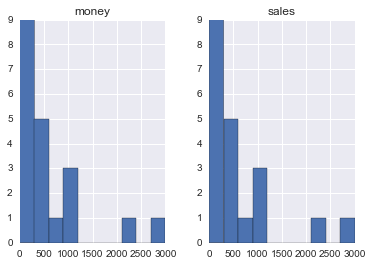

In [66]:
# a. 総経営耕地面積に関する度数分布表とヒストグラムを作りなさい。
df.hist()

In [67]:
df.describe()

,money,sales
count,20.000000,20.000000
mean,581.950000,581.950000
std,772.010668,772.010668
min,0.000000,0.000000
25%,100.000000,100.000000
50%,400.000000,400.000000
75%,675.000000,675.000000
max,3000.000000,3000.000000


In [62]:
# 0から1000まで50刻みで
area_hist,area_bins=np.histogram(area, bins = range(0,1000,50))
print(area_hist,area_bins)

[4 3 2 3 1 1 1 2 0 0 0 2 0 0 0 1 0 0 0] [  0  50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850
 900 950]


In [72]:
# b.area,salesについて算術平均,分散,標準偏差,変動係数を求めなさい。(めんどくさいからsalesは略)

# 算術平均,分散,標準偏差
print(np.average(sales),np.var(sales),np.std(sales))
# 変動係数= 標準偏差/算術平均
print(np.std(sales)/np.average(sales))

581.95 566200.4475 752.462921013
1.29300269957


In [73]:
# c.area,salesの相関係数を求めなさい。
np.corrcoef(money, area)[0, 1]

0.84088799022903149

In [75]:
# 問3 算術平均と幾何平均を比較
a=np.array([2,4,5,7])
b=np.array([2,4,5,70])

# 算術平均
print(np.average(a), np.average(b))
# print(np.mean(a), np.mean(b)) meanもaverage同じ
# 幾何平均
print(gmean(a), gmean(b))

4.5 20.25
4.09062348924 7.27427152513


In [ ]:
# section2

In [79]:
# 問1 標準化
money_copy = np.copy(sales)
money_std = (money_copy - money_copy.mean()) / money_copy.std()
print(money_std)

# 標準化後は平均0,標準偏差1
print(np.mean(money_std),np.std(money_std))

[-0.24180593 -0.75345905 -0.1354884   0.54627276  0.02398789 -0.57404822
 -0.62056214 -0.70694513 -0.77339359 -0.6006276   3.21351383 -0.10890902
 -0.50759976 -0.70030029  2.15033851 -0.77206462  0.42267863  0.55557555
 -0.17535748 -0.24180593]
-3.74700270811e-17 1.0


In [80]:
# 歪度
print(sp.stats.kurtosis(sales))
# 尖度
print(sp.stats.skew(sales))

3.5112340125130954
2.0338820294575446


In [82]:
print("標準化後得点:",str((80-60)/10))
print("偏差値:",str((80-60)*10/10+50))

標準化後得点: 2.0
偏差値: 70.0


In [ ]:
# 付録の標準正規分布表の上側確率をみる
# 上位2.28%

In [93]:
japan=127370000
n=484600 #松戸人口
people_per_year=20204

# 食中毒はめったにおきないのでポアソン分布に従って発生するとしてよい
# lanbda=試行回数n(松戸市民人口) * 生起確率p(国民 1 人が 1 日あたりに食 中毒になる確率) 
lam=n*(people_per_year/(365*japan))

In [94]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
# ポアソン分布=平均でλ回発生する事象が x 回発生すると考えられる確率
# 今回ほしいのは千葉県松戸市(人口 484 600 人)において食 中毒にかかる人が 1 人も発生しない日の確率
sp.stats.poisson.pmf(0,lam)

0.81009710260405043